# STOCK PRICE PREDICTION OF ICICI COMPANY(5 yr data)

In [1]:
#IMPORTING ALL REQUIRED PACKAGES
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.pylab import rcParams
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA

from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import matplotlib.ticker as ticker

In [2]:
data=pd.read_csv('ic_5.csv')
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-03-28,212.727264,212.727264,203.545456,204.954544,195.222260,20214214.0
1,2016-03-29,203.000000,206.318176,202.181824,203.090912,193.447144,20447782.0
2,2016-03-30,207.727264,217.272720,206.181824,215.909088,205.656662,23016348.0
3,2016-03-31,216.545456,219.409088,212.454544,215.136368,204.920624,30614104.0
4,2016-04-01,214.545456,217.681824,211.545456,216.636368,206.349396,15677352.0
...,...,...,...,...,...,...,...
1231,2021-03-22,586.849976,586.849976,569.500000,573.450012,573.450012,21755401.0
1232,2021-03-23,576.000000,589.250000,574.299988,586.400024,586.400024,29486417.0
1233,2021-03-24,580.000000,580.549988,565.000000,567.500000,567.500000,24434219.0
1234,2021-03-25,568.099976,579.000000,557.099976,571.549988,571.549988,27170186.0


# EXPLORATORY DATA ANALYSIS(EDA)

In [3]:
#CHECKING SHAPE OF DATASET
data.shape

(1236, 7)

In [4]:
data.iloc[197]

Date          2017-01-12
Open             242.364
High                 245
Low              241.318
Close            243.955
Adj Close        237.153
Volume       1.17113e+07
Name: 197, dtype: object

In [5]:
#CHECKING NULL VALUES IN DATASET
data.isnull().sum()

Date         0
Open         2
High         2
Low          2
Close        2
Adj Close    2
Volume       2
dtype: int64

In [6]:
#SINCE THE DATASET HAD NULL VALUES, WE REMOVE IT USING DROPNA() 
data1=data.dropna()
data1

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-03-28,212.727264,212.727264,203.545456,204.954544,195.222260,20214214.0
1,2016-03-29,203.000000,206.318176,202.181824,203.090912,193.447144,20447782.0
2,2016-03-30,207.727264,217.272720,206.181824,215.909088,205.656662,23016348.0
3,2016-03-31,216.545456,219.409088,212.454544,215.136368,204.920624,30614104.0
4,2016-04-01,214.545456,217.681824,211.545456,216.636368,206.349396,15677352.0
...,...,...,...,...,...,...,...
1231,2021-03-22,586.849976,586.849976,569.500000,573.450012,573.450012,21755401.0
1232,2021-03-23,576.000000,589.250000,574.299988,586.400024,586.400024,29486417.0
1233,2021-03-24,580.000000,580.549988,565.000000,567.500000,567.500000,24434219.0
1234,2021-03-25,568.099976,579.000000,557.099976,571.549988,571.549988,27170186.0


In [7]:
data1.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
#DESCIPTION OF DATASET
data1.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,1.234000e+03
mean,348.414074,353.172193,343.389468,348.320181,344.775072,2.285320e+07
std,100.948005,102.153953,99.672956,101.017028,103.592236,1.690414e+07
min,194.545456,199.909088,193.818176,194.954544,185.697128,1.114874e+06
25%,274.342049,276.949990,271.093186,274.353416,267.988373,1.297270e+07
50%,325.649994,332.925003,320.250000,326.800003,323.388138,1.827545e+07
75%,401.337509,408.399994,394.287491,400.987503,399.722488,2.715583e+07
max,673.400024,679.400024,652.000000,673.950012,673.950012,2.868577e+08


In [9]:
#INFORMATION ABOUT DATASET
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1234 entries, 0 to 1235
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1234 non-null   object 
 1   Open       1234 non-null   float64
 2   High       1234 non-null   float64
 3   Low        1234 non-null   float64
 4   Close      1234 non-null   float64
 5   Adj Close  1234 non-null   float64
 6   Volume     1234 non-null   float64
dtypes: float64(6), object(1)
memory usage: 77.1+ KB


In [10]:
data2 = data1.groupby('Date')[['Close']].mean()


In [11]:
data2

,Close
Date,
2016-03-28,204.954544
2016-03-29,203.090912
2016-03-30,215.909088
2016-03-31,215.136368
2016-04-01,216.636368
...,...
2021-03-22,573.450012
2021-03-23,586.400024
2021-03-24,567.500000


In [12]:
type(data1.Date[0])

str

# VISUALIZATION OF DATASET

Text(0, 0.5, 'Price')

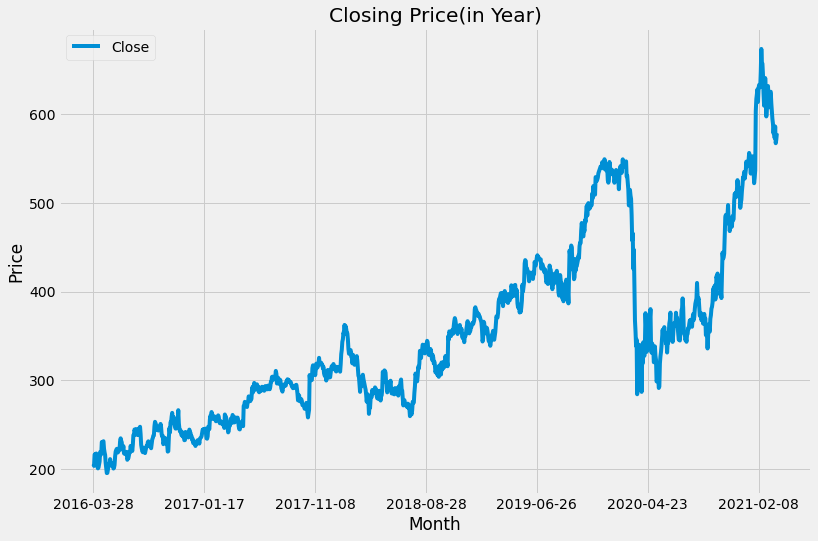

In [13]:
#plotting the graph with date againts closing price(in month)
data1.plot(figsize=(12,8),x='Date',y='Close',title='Closing Price(in Year)',fontsize=14)
plt.xlabel("Month")
plt.ylabel("Price")

In [14]:
data2

,Close
Date,
2016-03-28,204.954544
2016-03-29,203.090912
2016-03-30,215.909088
2016-03-31,215.136368
2016-04-01,216.636368
...,...
2021-03-22,573.450012
2021-03-23,586.400024
2021-03-24,567.500000


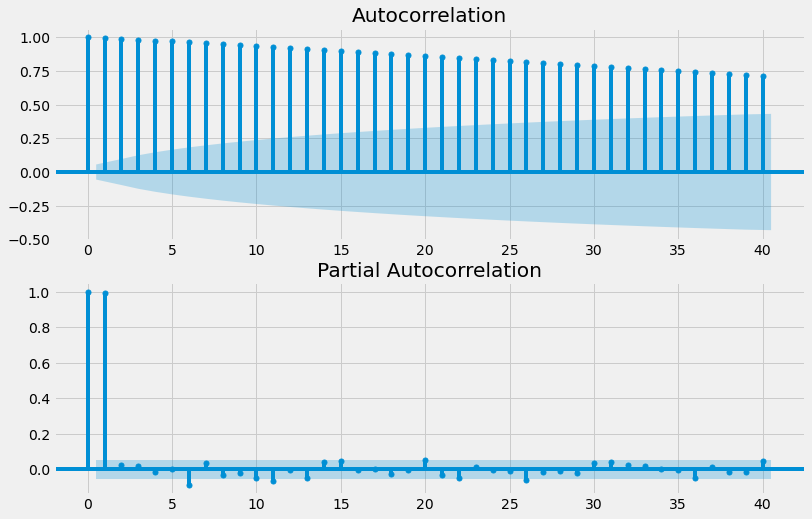

In [15]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data2['Close'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data2['Close'].iloc[13:],lags=40,ax=ax2)

# DICKEY FULLER TEST(For checking stationarity)

In [16]:
test_result=adfuller(data2['Close'])
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")


In [17]:
data2['Close First Difference'] = data2['Close'] - data2['Close'].shift(1)
data2['Close'].shift(1)


Date
2016-03-28           NaN
2016-03-29    204.954544
2016-03-30    203.090912
2016-03-31    215.909088
2016-04-01    215.136368
                 ...    
2021-03-22    586.650024
2021-03-23    573.450012
2021-03-24    586.400024
2021-03-25    567.500000
2021-03-26    571.549988
Name: Close, Length: 1234, dtype: float64

ADF Test Statistic : -8.047945073549268
p-value : 1.7736274068252257e-12
#Lags Used : 18
Number of Observations Used : 1214
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


Text(0, 0.5, 'Price')

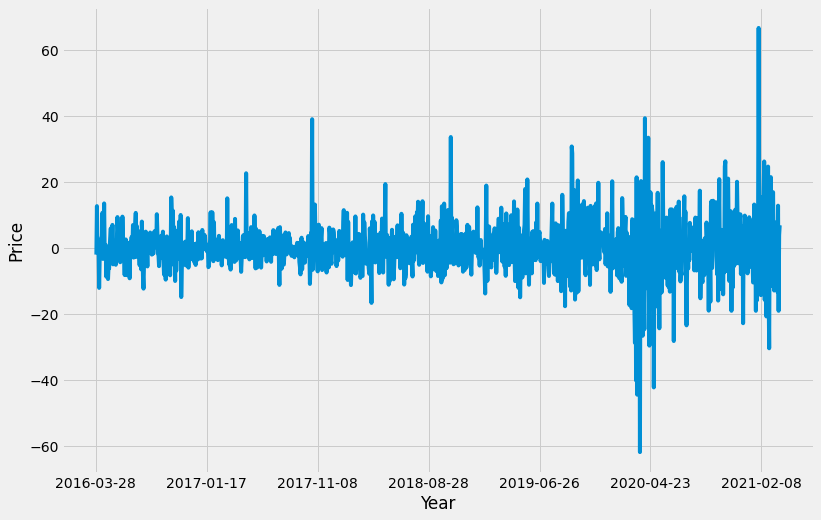

In [18]:
adfuller_test(data2['Close First Difference'].dropna())
data2['Close First Difference'].plot(figsize=(12,8))
plt.xlabel("Year")
plt.ylabel("Price")

In [19]:
stepwise_fit = auto_arima(data2['Close'], trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=8728.829, Time=1.07 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=8722.118, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=8723.019, Time=0.25 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=8723.010, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=8721.760, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=8724.929, Time=0.47 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 2.174 seconds


In [20]:
train_data, test_data = data2[0:int(len(data2)*0.7)], data2[int(len(data2)*0.7):]
training_data = train_data['Close'].values
test_data = test_data['Close'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(0,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)


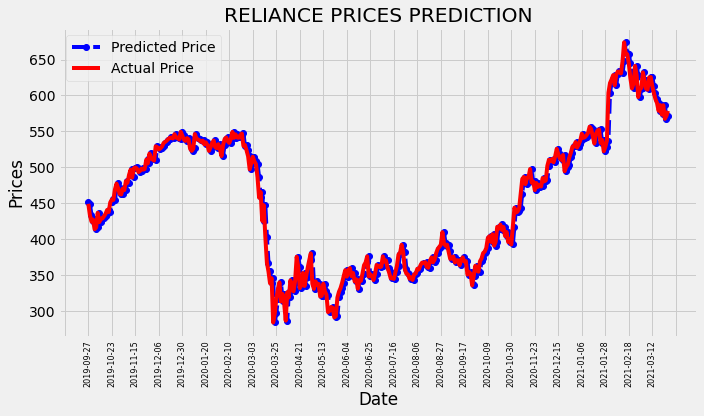

In [21]:
test_set_range = data2[int(len(data2)*0.7):].index
ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(15))
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title('RELIANCE PRICES PREDICTION')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.xticks(rotation=90)
plt.tick_params(axis='x' ,labelsize=8)
# plt.xticks(np.arange(881,1259,50), data2.Date[881:1259:50])
plt.legend()
plt.tight_layout()
plt.show()

In [22]:
pred=model_fit.predict(start=len(data2),end=len(data2)+30,typ='levels')
print(pred)

[571.84754924 572.14511047 572.44267171 572.74023295 573.03779419
 573.33535542 573.63291666 573.9304779  574.22803913 574.52560037
 574.82316161 575.12072284 575.41828408 575.71584532 576.01340656
 576.31096779 576.60852903 576.90609027 577.2036515  577.50121274
 577.79877398 578.09633521 578.39389645 578.69145769 578.98901893
 579.28658016 579.5841414  579.88170264 580.17926387 580.47682511
 580.77438635 581.07194758]


In [23]:
# model performance
mse = mean_squared_error(test_data, model_predictions)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data,model_predictions)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, model_predictions))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(model_predictions - test_data)/np.abs(test_data))
print('MAPE: '+str(mape))

MSE: 151.18522542962455
MAE: 8.851524131757166
RMSE: 12.295740133461855
MAPE: 0.24826577657569046
